In [33]:
from PIL import Image
from torchvision import transforms
import os
import torch
import torchvision
import matplotlib.pyplot as plt

COLOR_PATH = "/data/fd2135/imagenet/ILSVRC/Data/DET/test/train"
SKETCH_PATH = "/data/fd2135/imagenet/ILSVRC/Data/DET/test/train_sketch"

import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
model = torchvision.models.resnet101(pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/fd2135/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
13.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

51.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

88.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.i

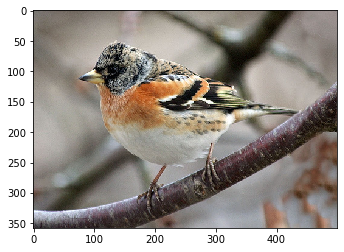

tensor(10, device='cuda:0')
torch.return_types.topk(
values=tensor([9.9941e-01, 2.0375e-04, 1.1325e-04, 1.0902e-04, 3.9546e-05, 2.6279e-05,
        2.3990e-05, 1.9829e-05, 4.4418e-06, 3.6980e-06], device='cuda:0'),
indices=tensor([ 10, 139,  11,  13,  15, 140, 142,  12,  86,  19], device='cuda:0'))


In [40]:
filename = ("n01530575_91.JPEG")
SEC_FILE_PATH=os.path.join(COLOR_PATH,filename)
input_image = Image.open(SEC_FILE_PATH).convert('RGB')
plt.imshow(input_image, cmap="gray")
plt.show()
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

a=torch.argmax(probabilities)
print(a)

print(torch.topk(probabilities, 10))

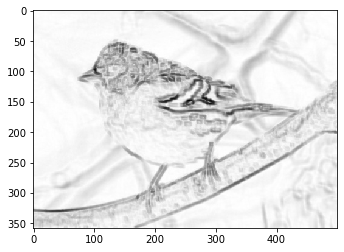

tensor(8.1800e-08, device='cuda:0')
tensor(347, device='cuda:0')
tensor(8.1800e-08, device='cuda:0')
torch.return_types.topk(
values=tensor([0.3427, 0.3324, 0.0616, 0.0358, 0.0184, 0.0115, 0.0096, 0.0078, 0.0059,
        0.0048], device='cuda:0'),
indices=tensor([ 10,  12, 601, 459,  13,  82,  15, 604,  16, 566], device='cuda:0'))


In [43]:
SEC_FILE_PATH=os.path.join(SKETCH_PATH,filename)
input_image = Image.open(SEC_FILE_PATH).convert('RGB')
plt.imshow(input_image, cmap="gray")
plt.show()
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

print(probabilities[a.item()])
a=torch.argmin(probabilities)
print(a)
print(probabilities[a.item()])

print(torch.topk(probabilities, 10))